The ML Landscape
================

**Author:** Robert Utterback



## What is ML?



-   Learning from data instead of explicit steps
-   Given some "training" data, learn what we can



## When to use ML?



-   Long lists of rules, especially "heuristic" rules
-   Complex problems with no good solution
-   Constantly changing environments
-   Need insights about complex things or big data



## Types of ML



### Type of data




-   Supervised vs. unsupervised
-   Semisupervised: some answers, some not
-   Weakly supervised: some answers, but don't trust them all
-   Regression vs Classification



-   Review Q: Supervised vs. unsupervised &#x2013; what's the difference?
    -   Review Q: Regression vs Classification



### Type of Learning Algorithm



-   Batch/offline learning: have all data up front
-   Online: train as data comes in



### Types of Assumptions Made



-   Instance-based: what training examples are similar?
-   Model-based: build a model from the data
-   Parametric vs. Non-parametric



## Example (model-based)



### Imports



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

### Download and prepare data



In [4]:
url = "https://github.com/ageron/data/raw/main/lifesat/lifesat.csv"
lifesat = pd.read_csv(url)
X = lifesat[["GDP per capita (USD)"]]
y = lifesat[["Life satisfaction"]]
lifesat.head()

Country  GDP per capita (USD)  Life satisfaction
0   Russia          26456.387938                5.8
1   Greece          27287.083401                5.4
2   Turkey          28384.987785                5.5
3   Latvia          29932.493910                5.9
4  Hungary          31007.768407                5.6

### Visualize



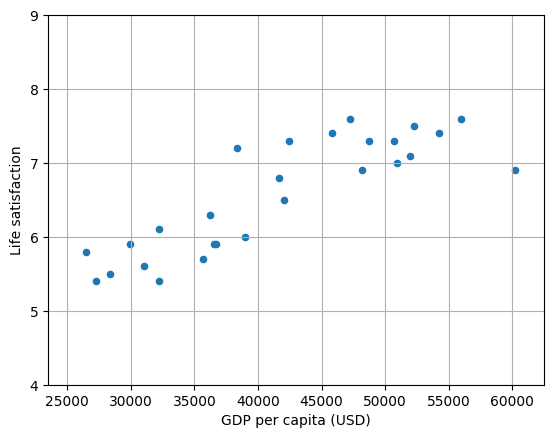

In [5]:
%matplotlib inline

lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

### Train model



In [6]:
model = LinearRegression()
model.fit(X, y)
# Show coefficients
print(model.intercept_, model.coef_)

[3.74904943] [[6.77889969e-05]]


## Challenges



-   Not enough data
-   Poor data: not representative, outliers, missing features,
    irrelevant features
-   Overfitting
-   Underfitting



### Overfitting



-   Model is too powerful!
-   Simplify the model: use fewer parameters
-   Constrain the model: regularization
-   Reduce attributes/features used
-   Use more data
-   Reduce noise (fix errors, remove outliers, etc.)



For overfitting talk about high degree polynomial, regularization, and
hyperparameters



### Underfitting



-   Model not powerful enough



## Testing and Validating



-   How to measure *generalization error*?
-   Split into training set and testing set (80/20)
-   Low training error + high test error = overfitting!



### Model Selection



-   How to choose between models or hyperparameter settings?



#### Wrong



-   Test lots of models/hyperparameter settings on test set
-   Find one that is good on this particular set (coincidence)



#### Correct



-   Holdout validation: train vs validation vs test set
-   Or: cross validation



## Guiding Principles



### What's your goal?



1.  Define a goal. 2. Figure out how to measure that goal!

In the real world people won't tell you what algorithm to use or even what type of ML (e.g., supervised vs. unsupervised) to use!
How to model your problem with ML tools? Should you use ML at all?



### The Cost of Complex Systems



Data driven first? yes! (or maybe)

Machine Learning first: No!



Do you always need ML? Sometimes used just b/c it's trendy&#x2026;
Use data, though.



### Consider the context



What is the baseline?

What is the benefit?



What do you want to achieve? What is the easiest way to achieve this?
And what will improving over this baseline buy you?

Electronics store example: closing down, want to send email to
customers for final sale. Use ML to predict which customers might
respond. But why? It's a closing sale.

What's the benefit? None! This is your closing sale. You'll never
email them again. It doesn't matter if they'll include you in your
spam filter. Just email everybody!



### Substitute Metrics



You need to measure what you actually care about, or something close
to it, and you actually have to be able to measure it. Often you need
to find a good substitute metric for what you really want b/c what you
really want is too hard to measure.

Ex: ad click rates. Doesn't necessarily translate to sales. Easy to
influence by putting ads next to what users often click on, or moving
stuff around after loading, or other dark patterns.



### Communicating Results



Explain to others, e.g., your boss, why it works, nothing weird will happen. An important skill.



### Explainable Results



![img](./assets/amazon_explanations.png)



Recommendation engines work better if you can explain to users why you
made those choices. Sometimes there's a balance between this and good
prediction accuracy.



### Ethical Considerations



![img](./assets/propublica_compas.png)



Sometimes explanations and transparency are REALLY important,
e.g. when lives are at stake. Ex: risk assessment system that had
racial bias. Situation might have been better if the system was more
transparent.

There's also a lot about how you use such data. Consider a school that
tries to predict whether students will suceed. There are a lot of
issues there about race, financial considerations, etc. If a school
uses that data to kick people out, those are going to come
up. However, if they use the predictions to provide extra support and
tutoring, maybe they don't come up (as much).



### Data and Data Collection



When do you stop collecting data? It improves the model (if it's the
right data), but what's the cost of getting it?



### Free vs. Expensive Data



<div class="column" style="float:left; width: 50%">
Free: 

Predict observable events

-   stock market
-   clicks

</div>
<div class="column" style="float:left; width: 50%">
Expensive

Automate complex process

-   Diagnosis
-   Drug Trial
-   Chip Design

</div>



### Big Data



-   Cost vs. benefit
-   Subsample to memory



Big datasets improve your models, but also more complicated to work
with. Python is easy, but slow. SPARK and others scale, but are hard
to work with.

You can learn it when you need it, but not to start.



### Cornerstones of This Course



-   Problem definition and success measures
-   Feature engineering and data cleaning
-   Strength and weaknesses of different algorithms
-   Model selection best practices



### The Machine Learning Pipeline



![img](./assets/ml-workflow.png)



Just **one** example of an ML workflow. Note that we're not done at the
end. Your system may change user behavior! Though we won't really
focus on that in this course.



## Loss Function Example



Toy example: have a bunch of 1D data (e.g., height), want to predict,
but restricted to predicting just 1 number.



Q: Do you already know what to predict? A: mean (or median, mode).



### Loss Functions



-   ML perspective: want your predictions to be accurate
-   So need some kind of measurement of how good or bad our predictions are
-   Often a "loss" function: want to minimize.



### Sum of Squares



$$ \sum_{i=1}^n (x_i - \hat{x})^2 $$



Q: Any guesses about why squared?
A: Harsh penalty for being very far away. Also: easier to optimize



### Optimization



-   Once you have the loss function, how do you find the $\hat{x}$ that
    minimizes it?
-   Math!
-   One way: derivative, set equal to zero, solve



### Alternative #1



-   Absolute value: $$ \sum_{i=1}^n |x_i - \hat{x}| $$
-   Harder to optimize&#x2026;
-   But it's the median!



### Alternative #2



-   Indicator function: $$ \sum_{i=1}^n \mathbb{1}_{x_i \ne \hat{x}} $$
-   Harder to optimize&#x2026;
-   But it's the mode!

